In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
rand_state=1000
df=pd.read_csv(r"D:\python\Scripts\MLX hackthon\trainpmm.csv")
df.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,641,GP,M,17.0,U,GT3,T,2.0,3.0,other,...,5.0,2.0,2.0,1.0,1.0,2.0,2.0,9.237551,12.231771,13.248906
1,510,GP,NaN,16.0,U,LE3,T,2.0,4.0,other,...,4.0,2.0,2.0,1.0,2.0,5.0,2.0,14.232852,12.243083,13.201829
2,516,GP,F,15.0,U,GT3,NaN,2.0,3.0,other,...,3.0,NaN,NaN,NaN,1.0,NaN,4.0,11.206084,NaN,11.100779
3,306,GP,M,15.0,R,GT3,T,3.0,4.0,NaN,...,5.0,3.0,NaN,1.0,1.0,5.0,2.0,12.202626,11.187831,11.176760
4,124,NaN,F,16.0,U,NaN,T,2.0,2.0,NaN,...,4.0,3.0,4.0,1.0,2.0,2.0,6.0,13.134366,11.210160,11.231368


In [2]:
#data cleanup
numeric_column=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
text_column=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
df[numeric_column]=df[numeric_column].apply(lambda col:col.fillna(col.mean()))
for column in text_column:
    if df[column].isna().sum()>0:
        non_nan_values=df[column].dropna().unique()
        df[column]=df[column].apply(lambda x: np.random.choice(non_nan_values) if pd.isna(x) else x)
df.tail()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
449,439,GP,M,17.000000,U,LE3,A,4.000000,4.000000,health,...,4.000000,4.0,2.0,1.540741,2.000000,3.454321,2.0,12.179021,15.119005,15.131663
450,602,MS,F,16.000000,R,GT3,T,0.000000,2.000000,other,...,3.000000,2.0,3.0,1.000000,2.000000,2.000000,0.0,12.182240,11.229306,12.232271
451,619,GP,M,16.723785,U,LE3,T,1.000000,2.324519,at_home,...,5.000000,3.0,3.0,1.000000,2.269048,2.000000,2.0,11.573324,8.174255,8.229643
452,203,GP,M,16.723785,U,GT3,T,4.000000,2.000000,health,...,3.868293,4.0,4.0,1.000000,1.000000,1.000000,9.0,11.145689,10.178071,10.203462
453,54,GP,M,18.000000,U,GT3,T,2.530303,2.000000,other,...,5.000000,5.0,4.0,3.000000,5.000000,2.000000,16.0,8.230069,7.193163,8.180131


In [3]:
categorical_column=df.columns.tolist()
numerical_column=['ID','G1','G2','G3']
categorical_column=list(filter(lambda item: item not in numerical_column,categorical_column))
categorical_column

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [4]:
numerical_column

['ID', 'G1', 'G2', 'G3']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          454 non-null    int64  
 1   school      454 non-null    object 
 2   sex         454 non-null    object 
 3   age         454 non-null    float64
 4   address     454 non-null    object 
 5   famsize     454 non-null    object 
 6   Pstatus     454 non-null    object 
 7   Medu        454 non-null    float64
 8   Fedu        454 non-null    float64
 9   Mjob        454 non-null    object 
 10  Fjob        454 non-null    object 
 11  reason      454 non-null    object 
 12  guardian    454 non-null    object 
 13  traveltime  454 non-null    float64
 14  studytime   454 non-null    float64
 15  failures    454 non-null    float64
 16  schoolsup   454 non-null    object 
 17  famsup      454 non-null    object 
 18  paid        454 non-null    object 
 19  activities  454 non-null    o

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,454.0,326.458150,190.663745,1.000000,158.750000,328.500000,494.750000,646.000000
age,454.0,16.723785,1.125824,15.000000,16.000000,16.723785,17.000000,22.000000
Medu,454.0,2.530303,1.078217,0.000000,2.000000,2.530303,3.750000,4.000000
Fedu,454.0,2.324519,1.058123,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,454.0,1.542579,0.693720,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,454.0,1.933333,0.782253,1.000000,1.000000,2.000000,2.000000,4.000000
failures,454.0,0.218673,0.546993,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,454.0,3.868293,0.928917,1.000000,3.868293,4.000000,4.000000,5.000000
freetime,454.0,3.189189,1.016891,1.000000,3.000000,3.000000,4.000000,5.000000
goout,454.0,3.161520,1.118791,1.000000,2.000000,3.000000,4.000000,5.000000


In [7]:
df.nunique()

ID            454
school          2
sex             2
age             9
address         2
famsize         2
Pstatus         2
Medu            6
Fedu            6
Mjob            5
Fjob            5
reason          4
guardian        3
traveltime      5
studytime       5
failures        5
schoolsup       2
famsup          2
paid            2
activities      2
nursery         2
higher          2
internet        2
romantic        2
famrel          6
freetime        6
goout           6
Dalc            6
Walc            6
health          6
absences       24
G1            410
G2            411
G3            454
dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(drop='first',sparse=False)
df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_column]))
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(categorical_column, axis=1)
df.head()

,ID,G1,G2,G3,0,1,2,3,4,5,...,99,100,101,102,103,104,105,106,107,108
0,641,9.237551,12.231771,13.248906,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,510,14.232852,12.243083,13.201829,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,516,11.206084,11.662033,11.100779,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,306,12.202626,11.187831,11.176760,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,124,13.134366,11.210160,11.231368,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
from sklearn.model_selection import train_test_split,cross_val_score
y=df['G3']
X=df.drop(['G3','ID'],axis=1)
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=rand_state)

[I 2023-12-30 22:07:59,864] A new study created in memory with name: no-name-393a2bbd-2051-4141-b8d6-d83e97243c23
[I 2023-12-30 22:08:00,793] Trial 0 finished with value: 2.749470704880094 and parameters: {'colsample_bytree': 0.6950817715881752, 'learning_rate': 0.3283796840394827, 'max_depth': 3, 'subsample': 0.5889173213584281, 'gamma': 0.49508370943799285, 'min_child_weight': 9, 'reg_alpha': 0.07027623334320965, 'reg_lambda': 0.03267923935161077, 'n_estimators': 481}. Best is trial 0 with value: 2.749470704880094.
[I 2023-12-30 22:08:01,209] Trial 1 finished with value: 6.870196145152729 and parameters: {'colsample_bytree': 0.22474659467726812, 'learning_rate': 0.21932418012070945, 'max_depth': 9, 'subsample': 0.1428438523402392, 'gamma': 0.44428769942356217, 'min_child_weight': 1, 'reg_alpha': 0.4732553438338679, 'reg_lambda': 0.671250470945334, 'n_estimators': 172}. Best is trial 0 with value: 2.749470704880094.
[I 2023-12-30 22:08:02,095] Trial 2 finished with value: 3.0674171583

Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8749101888579041, 'learning_rate': 0.09285460069220403, 'max_depth': 18, 'subsample': 0.8745595125191636, 'gamma': 0.5703084117420514, 'min_child_weight': 7, 'reg_alpha': 0.7526439838243811, 'reg_lambda': 0.28936208593653223, 'n_estimators': 196}
Mean Squared Error on Test Set for XGBoost: 2.4648617637441403


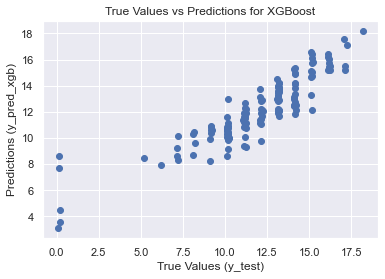

In [10]:
import xgboost as xgb
import optuna
from sklearn.metrics import mean_squared_error
# XGBoost Model training and hyperparameter optimization
def objective_xgb(trial):
    params = {
        'objective': 'reg:squarederror',
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
    }

    model_xgb = xgb.XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)

    y_pred_xgb = model_xgb.predict(X_test)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)

    return mse_xgb

# Create Optuna study and optimize for XGBoost
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=20)

# Get the best hyperparameters for XGBoost
best_params_xgb = study_xgb.best_params
print("Best Hyperparameters for XGBoost:", best_params_xgb)

# Train the final XGBoost model with the best hyperparameters
final_model_xgb = xgb.XGBRegressor(**best_params_xgb)
final_model_xgb.fit(X_train, y_train)

# Evaluate on the test set with XGBoost
y_test_pred_xgb = final_model_xgb.predict(X_test)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
print("Mean Squared Error on Test Set for XGBoost:", mse_test_xgb)

# Plot true vs predictions in the test set for XGBoost
plt.scatter(y_test, y_test_pred_xgb)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred_xgb)')
plt.title('True Values vs Predictions for XGBoost')
plt.show()

[I 2023-12-30 22:08:17,130] A new study created in memory with name: no-name-f215a3c8-f56e-4856-805e-9fd47ecf2f9c
[I 2023-12-30 22:08:18,055] Trial 0 finished with value: 2.977036338529555 and parameters: {'learning_rate': 0.24593198400849287, 'n_estimators': 452, 'max_depth': 12, 'subsample': 0.5724909052789059, 'min_samples_split': 3, 'min_samples_leaf': 13, 'alpha': 0.13516006278191484}. Best is trial 0 with value: 2.977036338529555.
[I 2023-12-30 22:08:18,188] Trial 1 finished with value: 5.953387596425777 and parameters: {'learning_rate': 0.23200284304275437, 'n_estimators': 184, 'max_depth': 17, 'subsample': 0.1151678775841355, 'min_samples_split': 17, 'min_samples_leaf': 15, 'alpha': 0.2254949283842288}. Best is trial 0 with value: 2.977036338529555.
[I 2023-12-30 22:08:19,070] Trial 2 finished with value: 2.9995329490143394 and parameters: {'learning_rate': 0.25218993545160673, 'n_estimators': 234, 'max_depth': 8, 'subsample': 0.8697479046129392, 'min_samples_split': 4, 'min_sa

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.07416630838614197, 'n_estimators': 349, 'max_depth': 9, 'subsample': 0.4373946748202218, 'min_samples_split': 20, 'min_samples_leaf': 8, 'alpha': 0.679467389150735}
Mean Squared Error on Test Set for Gradient Boosting: 2.7165895679486898


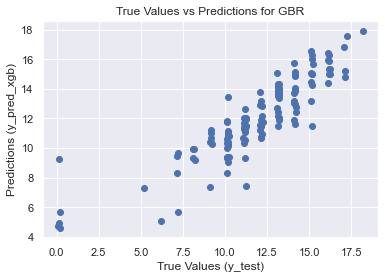

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Model training and hyperparameter optimization
def objective_gbr(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'alpha': trial.suggest_float('alpha', 0.0, 1.0),
    }

    model_gbr = GradientBoostingRegressor(**params)
    model_gbr.fit(X_train, y_train)

    y_pred_gbr = model_gbr.predict(X_test)
    mse_gbr = mean_squared_error(y_test, y_pred_gbr)

    return mse_gbr

# Create Optuna study and optimize for Gradient Boosting
study_gbr = optuna.create_study(direction='minimize')
study_gbr.optimize(objective_gbr, n_trials=20)

# Get the best hyperparameters for Gradient Boosting
best_params_gbr = study_gbr.best_params
print("Best Hyperparameters for Gradient Boosting:", best_params_gbr)

# Train the final Gradient Boosting model with the best hyperparameters
final_model_gbr = GradientBoostingRegressor(**best_params_gbr)
final_model_gbr.fit(X_train, y_train)

# Evaluate on the test set with Gradient Boosting
y_test_pred_gbr = final_model_gbr.predict(X_test)
mse_test_gbr = mean_squared_error(y_test, y_test_pred_gbr)
print("Mean Squared Error on Test Set for Gradient Boosting:", mse_test_gbr)

plt.scatter(y_test,y_test_pred_gbr)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred_xgb)')
plt.title('True Values vs Predictions for GBR')
plt.show()

Mean Squared Error on Test Set for Random Forest: 2.5572808597878756


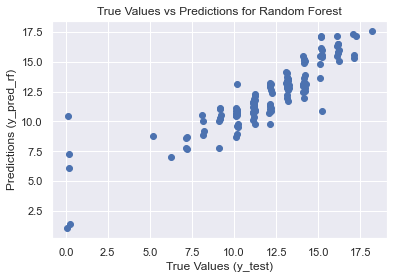

In [12]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=rand_state)
model_rf.fit(X_train, y_train)

# Evaluate on the test set with Random Forest
y_test_pred_rf = model_rf.predict(X_test)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
print("Mean Squared Error on Test Set for Random Forest:", mse_test_rf)
# Plot true vs predictions in the test set for Random Forest
plt.scatter(y_test, y_test_pred_rf)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred_rf)')
plt.title('True Values vs Predictions for Random Forest')
plt.show()

In [14]:
# Simple Averaging
ensemble_avg = (y_test_pred_xgb + y_test_pred_gbr + y_test_pred_rf) / 3

# Display the results or use the ensemble predictions for further evaluation
print("Ensemble Averaging MSE:", mean_squared_error(y_test, ensemble_avg))

Ensemble Averaging MSE: 2.4116580160967667


In [ ]:
a=int